In [1]:
%pylab inline
from requests import post
from app.analysis import Quote
def screen_funds(*filter, min_assets=1, max_expense=1):
    query = 'query screen($filter:[String!]!,$limit:[FundLimitOptionInput!]!){viewer{screenFunds(filterCategory:$filter,limit:$limit,sort:{type:FUND_TOTAL_ASSETS,direction:DESC},first:100){edges{node{symbol}}}}}'
    variables = {'filter':filter,'limit':[{'type':'FUND_TOTAL_ASSETS','min':min_assets*1000000000,'inclusive':True},{'type':'FUND_NET_EXPENSE_RATIO','max':max_expense,'inclusive':True}]}
    r = post('https://lens.m1finance.com/graphql', json={'query': query, 'variables': variables}).json()
    return [n['node']['symbol'] for n in r['data']['viewer']['screenFunds']['edges']]

Populating the interactive namespace from numpy and matplotlib


In [2]:
quote = Quote(screen_funds('Bonds') + ['AGG', 'BND', 'BNDX', 'BIV', 'SCHZ'], 60, 5)
print(f'from {quote.start.date()} to {quote.end.date()} - {len(quote.data.columns)}')

from 2019-05-15 to 2019-07-12 - 77


In [8]:
stats = quote.statistics()
stats = stats[(stats['shrp'] > 0) & (stats['std'] > 0.01)]
print(len(stats))
stats.sort_values('mean', ascending=False).head(20)

64


,len,mean,std,shrp,yield,drawdown
Symbols,,,,,,
EMLC,36,0.196480,0.165781,1.137303,7.021613,1.334553
VCLT,36,0.162176,0.223435,0.690314,5.361095,2.439522
BLV,36,0.146242,0.222186,0.622474,4.503085,2.488783
TLT,36,0.133421,0.282118,0.444795,3.657498,3.084717
SPTL,36,0.132568,0.270853,0.460145,3.637486,2.930501
EMB,36,0.115524,0.165875,0.648607,4.326756,1.290153
VWOB,36,0.113381,0.128736,0.819074,4.169122,0.829215
LQD,36,0.111957,0.154719,0.672316,3.661071,1.584890
CWB,36,0.097639,0.262757,0.341389,3.506925,3.517511


{'BNDX': 0.498, 'EMLC': 0.252, 'NUV': 0.25} 0.106


,count,mean,std,min,25%,50%,75%,max,shrp,yield,drawdown
Portfolio,36.0,0.106272,0.064250,-0.034996,0.060455,0.102066,0.162017,0.218908,1.530516,3.703500,0.356264
EMLC,36.0,0.196480,0.165781,-0.189570,0.079343,0.172383,0.333436,0.544785,1.137303,7.021613,1.334553
BNDX,36.0,0.075138,0.064667,-0.118298,0.041495,0.085902,0.120373,0.165877,1.039189,2.411216,0.711435
NUV,36.0,0.076375,0.131180,-0.158135,-0.014294,0.068994,0.196647,0.298745,0.521712,2.933071,0.982324


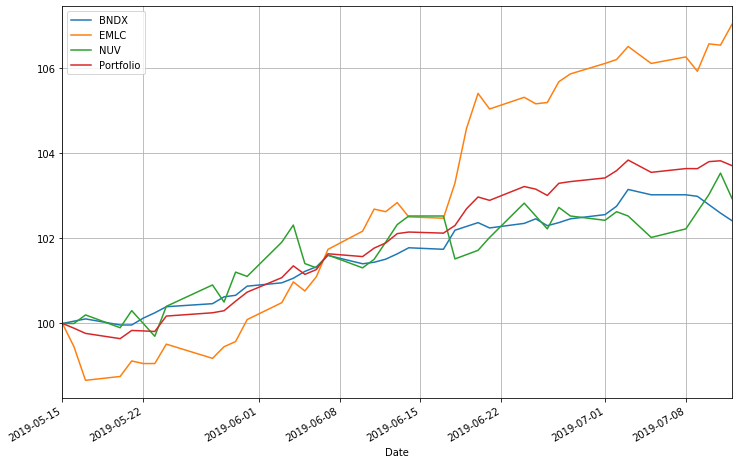

In [9]:
quote.setup_mask(['BNDX', 'EMLC', 'NUV'])
ratio, mean, *_ = quote.find_optimal_ratio(_lambda=1)
print(ratio, mean)
quote.graph(ratio)

evicted BSCK 0.795 -0.185
evicted IBDL 0.738 -0.233
evicted FLRN 0.345 -0.241
evicted SCHP 0.747 -0.194
evicted PZA 0.712 -0.300
evicted TFI 0.725 -0.296
evicted BWX 0.676 0.038
evicted VGIT 0.494 -0.415
evicted VCLT 0.782 -0.138
evicted EMB 0.768 -0.475
evicted CWB 0.530 -0.491
evicted HYD 0.265 -0.028
evicted NUV 0.357 -0.223
retry backlogs ['HYLB', 'HYG', 'IGSB', 'VGSH', 'GOVT', 'CMF', 'VTIP', 'TLT', 'STIP', 'SPTS', 'HYLS', 'LMBS', 'SHY', 'SCHO', 'BND', 'SPSB', 'IGIB', 'BSV', 'SCHR', 'AGG', 'TDTT', 'IEI', 'TIP', 'MUB', 'LQD', 'SPIB', 'MBB', 'BIV', 'VTEB', 'ISTB', 'VCSH', 'BSJK', 'IPE', 'IEF', 'VMBS', 'SLQD', 'SJNK', 'SHYG', 'JNK', 'SCHZ', 'ITM', 'USIG', 'VCIT', 'SUB', 'SPTL', 'BLV', 'VWOB', 'HYS'] at 0.805/-0.51 - 1.491
evicted LMBS 0.752 0.081
evicted VWOB 0.778 -0.224
evicted HYG 0.644 -0.415
evicted IPE 0.702 0.447
evicted SUB 0.679 -0.147
evicted TLT 0.656 0.056
evicted ITM 0.569 0.032
retry backlogs ['VCSH', 'STIP', 'SLQD', 'BIV', 'MBB', 'AGG', 'SHY', 'JNK', 'IEF', 'BSV', 'SPTL

,count,mean,std,min,25%,50%,75%,max,shrp,yield,drawdown
Portfolio,36.0,0.106272,0.064250,-0.034996,0.060455,0.102066,0.162017,0.218908,1.530516,3.703500,0.356264
EMLC,36.0,0.196480,0.165781,-0.189570,0.079343,0.172383,0.333436,0.544785,1.137303,7.021613,1.334553
BNDX,36.0,0.075138,0.064667,-0.118298,0.041495,0.085902,0.120373,0.165877,1.039189,2.411216,0.711435
NUV,36.0,0.076375,0.131180,-0.158135,-0.014294,0.068994,0.196647,0.298745,0.521712,2.933071,0.982324


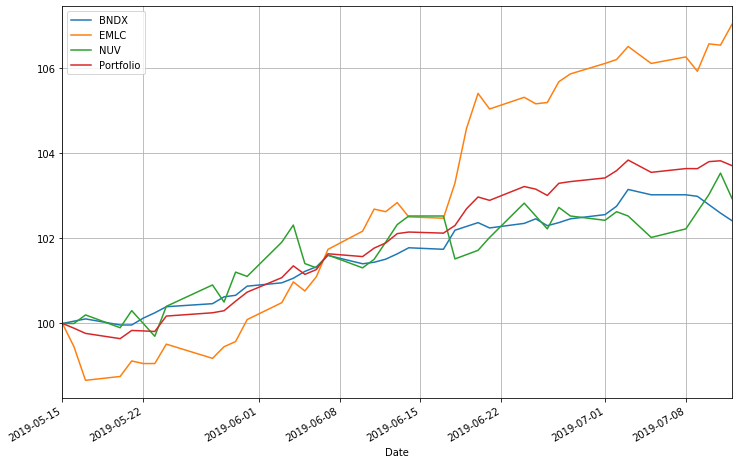

In [10]:
bounds = .08, .13
quote.setup_mask(stats.index)
sd = quote.optimize_portfolio(backlogs_pos_threshold=.8, _lambda=1, bounds=bounds)
quote.setup_mask(['BNDX', 'EMLC', 'NUV'])
sd.update(quote.optimize_portfolio(_lambda=1, bounds=bounds))
quote.setup_mask({e for r in sd.values() for e in r})
sd.update(quote.optimize_portfolio(_lambda=1, bounds=bounds))
for e in sd:
    print(e, sd[e])
_, ratio = sd.peekitem()
quote.setup_mask(ratio)
quote.graph(ratio)